## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [257]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
df = pd.read_csv('Housing.csv')

In [7]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [9]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [27]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop('furnishingstatus',axis=1)
y=df['furnishingstatus']
print(x.shape)
print(y.shape)
df.head()

(545, 12)
(545,)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


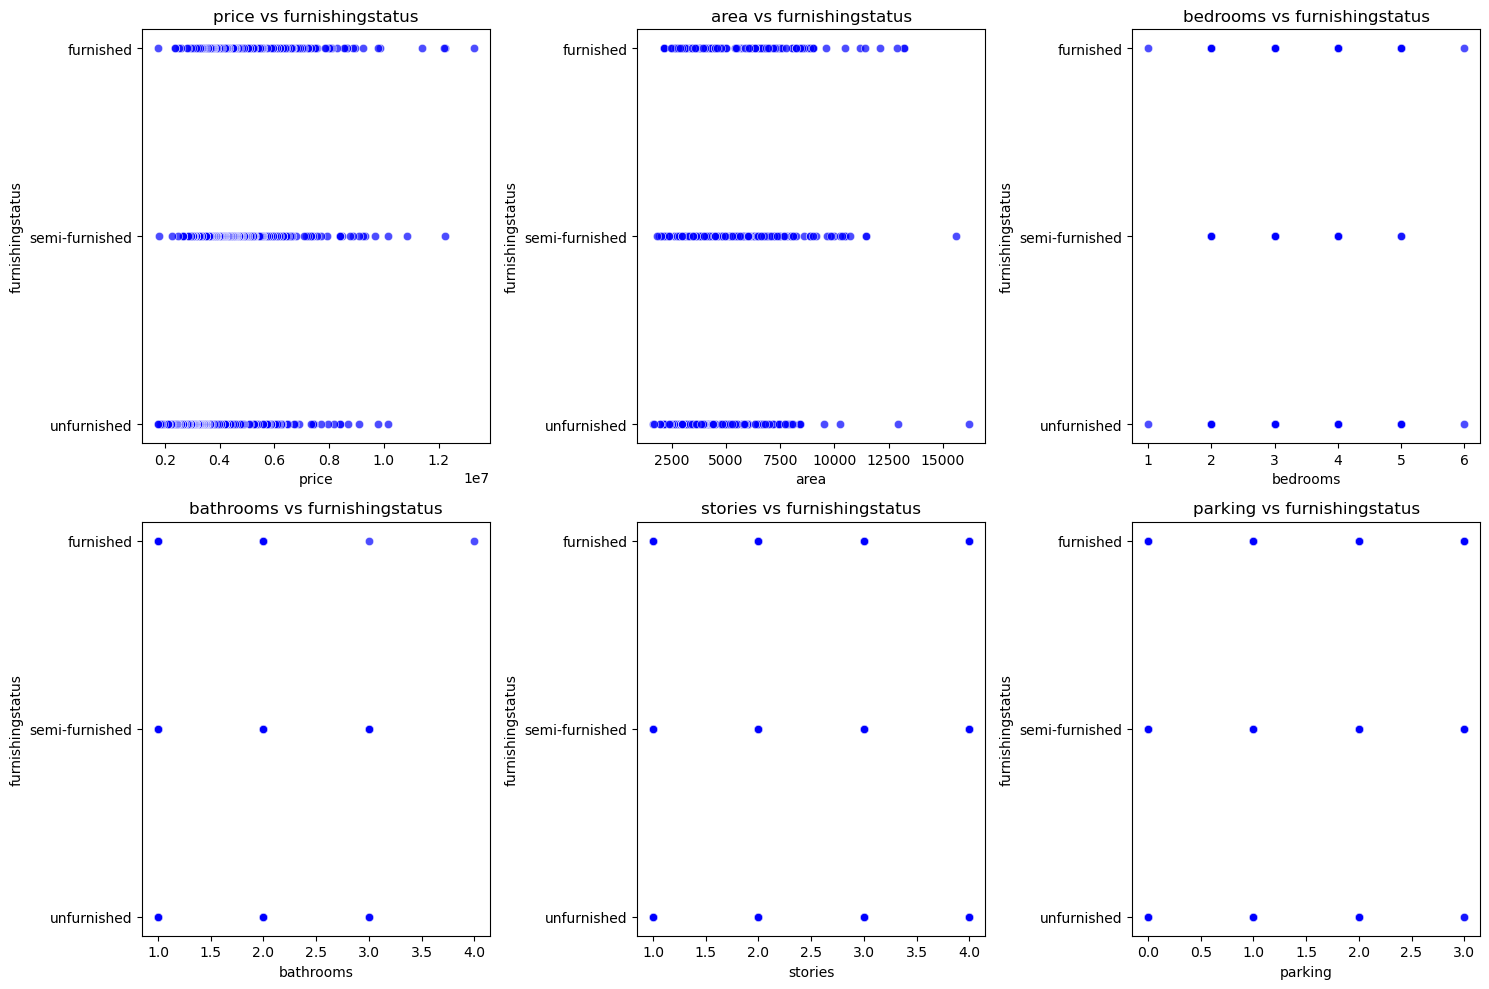

In [265]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
# Define independent variables (features) and dependent variable (target
features = ["price","area", "bedrooms", "bathrooms", "stories", "parking"]
target = 'furnishingstatus'

# Set plot size
plt.figure(figsize=(15, 10))

# Generate scatterplots for each feature vs. target
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arrange in a 2x3 grid
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.7, color="blue")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()


In [271]:
#7 Encoding categorical data in X
label_encoder = LabelEncoder()
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

In [273]:
#8  Avoiding the Dummy Variable Trap
#x = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)


In [293]:
#9 Apply feature scaling on numerical variables
num_cols = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


In [295]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

x=df.drop('furnishingstatus',axis=1)
y=df['furnishingstatus']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [297]:
#11 Fitting Multiple Linear Regression to the Training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [299]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)


0.06670745016849322


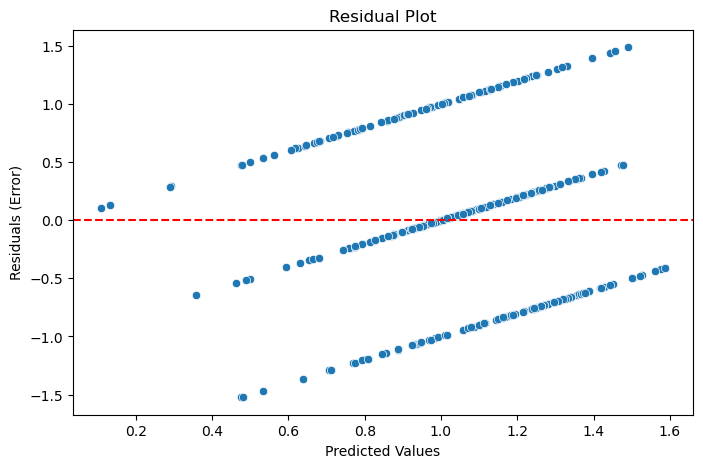

In [289]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

# Ensure proper predictions
y_train_pred = model.predict(X_train)

# Compute residuals
residuals = y_train_pred - y_train

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


In [227]:
#14  Predic on the test set
print("Predictions on Test Set:\n", y_pred[:10]) 
print("R² Score on Test Set:", score)

Predictions on Test Set:
 [1.23872278 0.91033935 1.25149276 0.87714544 1.33087345 1.14261589
 1.00430496 1.01034899 1.44575795 1.43269887]
R² Score on Test Set: 0.06670745016849322


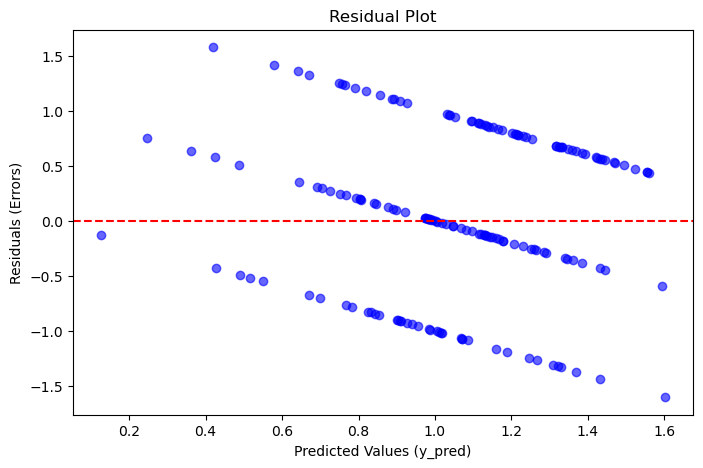

In [233]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
errors = y_test - y_pred  # Residuals = Actual - Predicted
# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, errors, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="dashed") 
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

In [243]:
#16 Print Mean Squared Error and R Squared Value

mse_test = mean_squared_error(y_test, y_pred)

r2_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse_test}")

print(f"R² Score on Test Set: {r2_test}")


Mean Squared Error on Test Set: 0.5552008029931627
R² Score on Test Set: 0.06670745016849322


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
